# 1. Reducción imágenes NGC 55

In [2]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)

## Para B


In [1]:
#Abrimos las imágenes de ciencia de NGC 55 en flitro B, de 900 segundos de exposición
rawB1=fits.open('Grupo 5/Light_Mouse_click_position_B_900.000secs_00000051.fit')
rawB2=fits.open('Grupo 5/Light_Mouse_click_position_B_900.000secs_00000052.fit')
rawB3=fits.open('Grupo 5/Light_Mouse_click_position_B_900.000secs_00000053.fit')

NameError: name 'fits' is not defined

In [ ]:
#Veamos el header
rawB1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [ ]:
#Extraigamos las imágenes
dataB1=rawB1[0].data
dataB2=rawB2[0].data
dataB3=rawB3[0].data

In [ ]:
B_raw = np.median(np.array([rawB1[0].data, rawB2[0].data, rawB3[0].data]), axis=0)

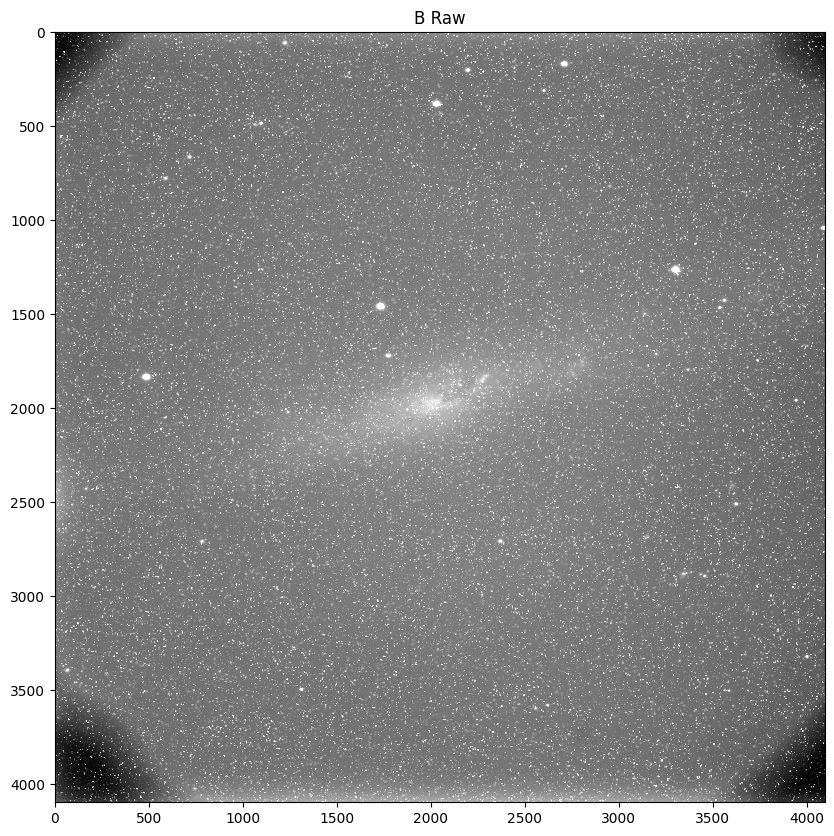

In [ ]:
#Grafiquemos una imagen
zscale=ZScaleInterval(contrast=0.15)
min_value,max_value=zscale.get_limits(B_raw)

fig=plt.figure(figsize=(10,10))
plt.title('B Raw')
plt.imshow(B_raw,vmin=min_value,vmax=max_value,cmap='gray')
#plt.savefig('B raw')
plt.show()

In [3]:
with fits.open('master_bias.fit') as hdul:
    master_bias = hdul[0].data
with fits.open('master_flatV_norm.fit') as hdul:
    master_flatV_norm = hdul[0].data    
with fits.open('master_flatB_norm.fit') as hdul:
    master_flatB_norm = hdul[0].data 
with fits.open('master_dark.fit') as hdul:
    master_dark = hdul[0].data

In [13]:
# Evitamos divisiones por cero añadiendo un pequeño valor donde master_flatB_norm es cero
master_flatB_norm_safe = np.where(master_flatB_norm == 0, 1e-10, master_flatB_norm)

In [ ]:
#Hagámos la reducción
#Ya que nuestro master dark es de 600 segundos igual que la imagen de ciencia, podemos restar directamente
#master dark y limpiar tanto el dark como el bias de las imágenes
# Luego realizamos la división
redB1 = (dataB1 - master_dark) / master_flatB_norm_safe
redB2 = (dataB2 - master_dark) / master_flatB_norm_safe
redB3 = (dataB3 - master_dark) / master_flatB_norm_safe

In [6]:
bpm=fits.open('BPM.fit')[0].data

In [ ]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara

imagen_finalB=np.mean([redB1,redB2,redB3],axis=0)*bpm

NameError: name 'redB1' is not defined

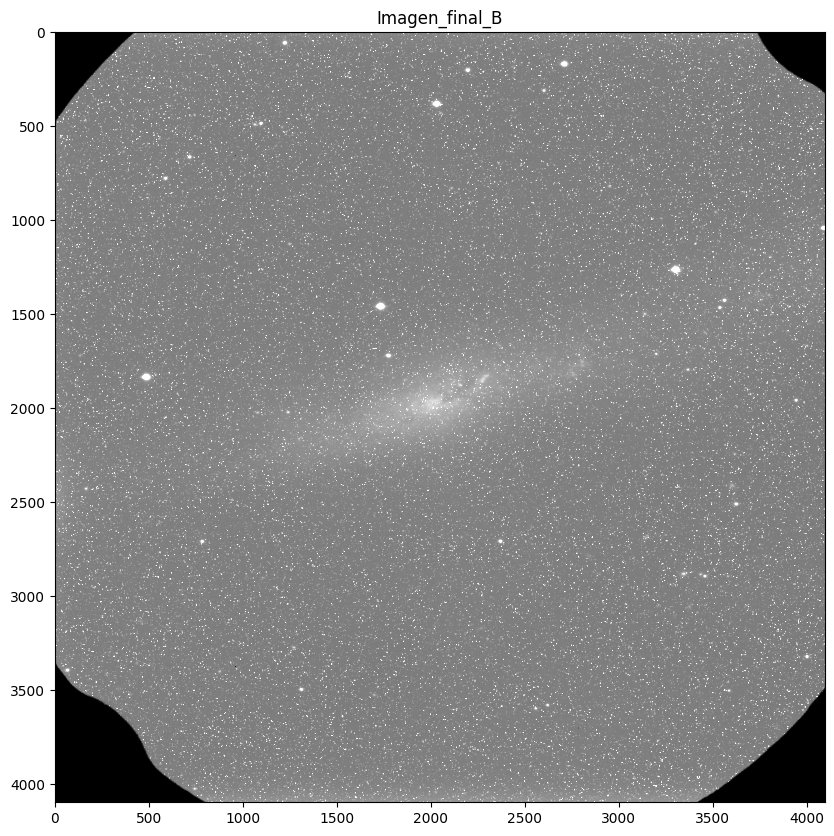

In [ ]:
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.1)
min_value,max_value=zscale.get_limits(imagen_finalB)

plt.imshow(imagen_finalB,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Imagen_final_B')
#plt.savefig('B')
plt.show()

## Para V

In [ ]:
#Abrimos las imágenes de ciencia de NGC 55 en flitro V, de 900 segundos de exposición
rawV1=fits.open('Grupo 5/Light_Mouse_click_position_V_600.000secs_00000048.fit')
rawV2=fits.open('Grupo 5/Light_Mouse_click_position_V_600.000secs_00000049.fit')
rawV3=fits.open('Grupo 5/Light_Mouse_click_position_V_600.000secs_00000050.fit')

In [36]:
#Veamos el header
rawV1[0].header


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [37]:
#Extraigamos las imágenes
dataV1=rawV1[0].data
dataV2=rawV2[0].data
dataV3=rawV3[0].data

In [38]:
V_raw = np.median(np.array([rawV1[0].data, rawV2[0].data, rawV3[0].data]), axis=0)

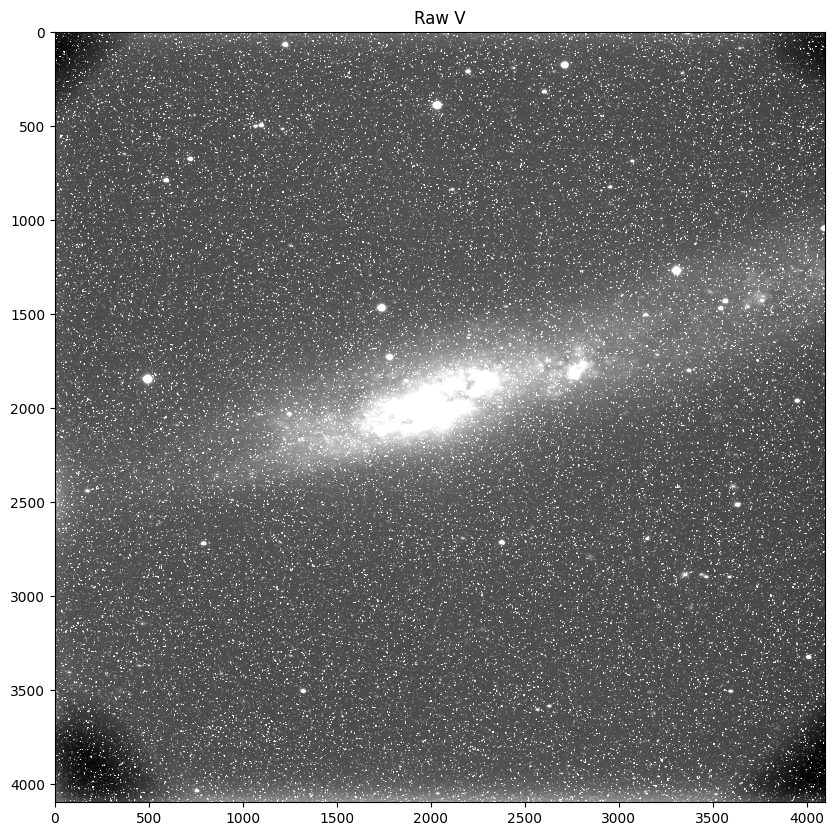

In [39]:
#Grafiquemos los RAW
zscale=ZScaleInterval(contrast=0.15)
min_value,max_value=zscale.get_limits(V_raw)

fig=plt.figure(figsize=(10,10))
plt.title('Raw V')
plt.imshow(V_raw,vmin=min_value,vmax=max_value,cmap='gray')
#plt.savefig('V raw')
plt.show()

In [40]:
#Hagámos la reducción
#Ya que nuestro master dark es de 600 segundos igual que la imagen de ciencia, podemos restar directamente
#master dark y limpiar tanto el dark como el bias de las imágenes
# Evitamos divisiones por cero añadiendo un pequeño valor donde master_flatB_norm es cero
master_flatV_norm_safe = np.where(master_flatV_norm == 0, 1e-10, master_flatV_norm)

# Luego realizamos la división
redV1 = (dataV1 - master_dark) / master_flatV_norm_safe
redV2 = (dataV2 - master_dark) / master_flatV_norm_safe
redV3 = (dataV3 - master_dark) / master_flatV_norm_safe

In [41]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara
bpm=fits.open('BPM.fit')[0].data
imagen_finalV=np.mean([redV1,redV2,redV3],axis=0)*bpm

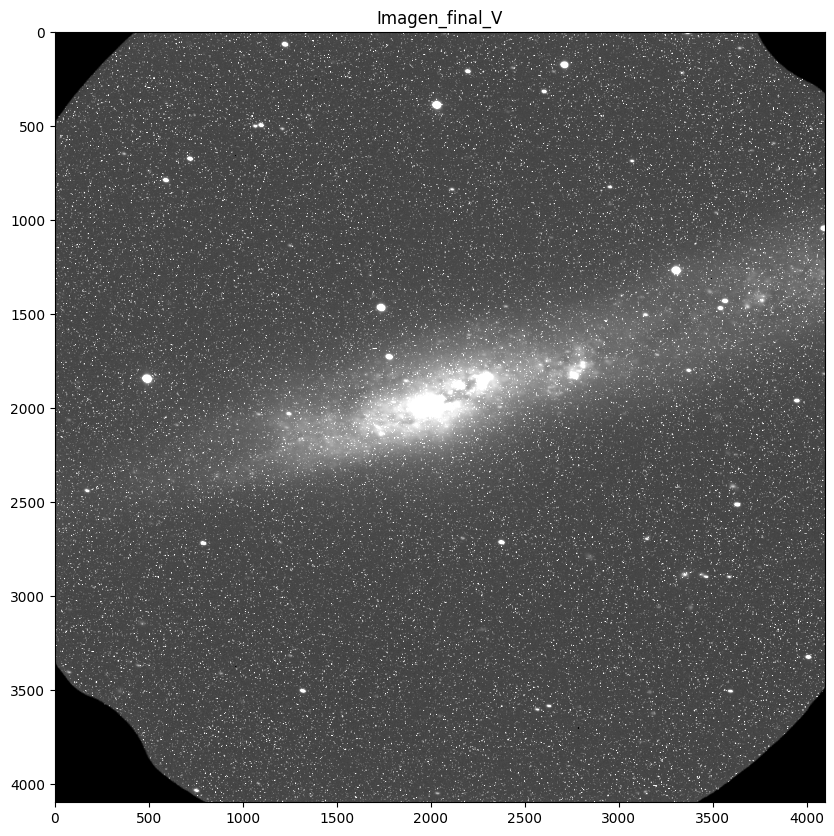

In [42]:
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.1)
min_value,max_value=zscale.get_limits(imagen_finalV)

plt.imshow(imagen_finalV,vmin=min_value,vmax=max_value,cmap='gray',)
plt.title('Imagen_final_V')

#plt.savefig('V')
plt.show()

si queremos generar la imagen a color debemos combinar las reducciones hechas por cada filtro

In [43]:
B=np.mean([redB1,redB2,redB3],axis=0)*bpm
R=np.mean([redV1,redV2,redV3],axis=0)*bpm
B[B < 0] = 0
R[R <0] = 0

#generamos la imagen para el RGB virtualmente promediando las imagenes que tenemos, asumiendo las imagenes en la banda V como rojas, el promedio entre V y B como Verde, y la banda B como azules
G=np.mean([B,R],axis=0)

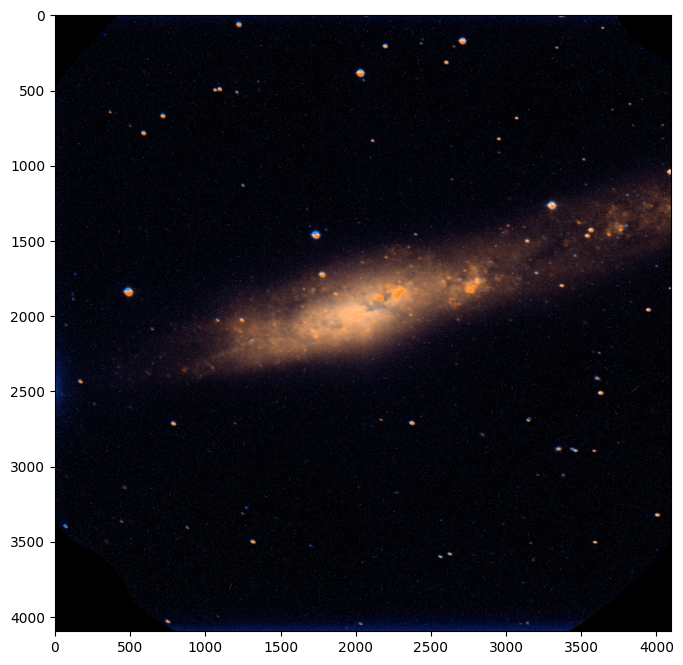

In [44]:
rgb= make_lupton_rgb(R,G,B,Q=3,minimum=[80,155,220],stretch=100)
fig=plt.figure(figsize=(8,8))
plt.imshow(rgb)
#plt.savefig('rgb.png',dpi='figure')
plt.show()
plt.close()

## Primera noche

In [ ]:
#Abrimos las imágenes de ciencia de NGC 55 en flitro B, de 540 segundos de exposición 
rawV=fits.open('Primeranoche/Light_Mouse_click_position_V_540.000secs_00000058.fit')
dataV=rawV[0].data

In [14]:
#Rescalamos el master dark para trabajar con el tiempo de exposicion de la imagen
factor_escala_dark = 540 / 600
master_dark_escalado = master_dark * factor_escala_dark


In [15]:
#reducimos la imagen
red = (dataV - master_dark_escalado) / master_flatB_norm_safe


In [16]:
imagen_final_PrimeraNoche=red*bpm

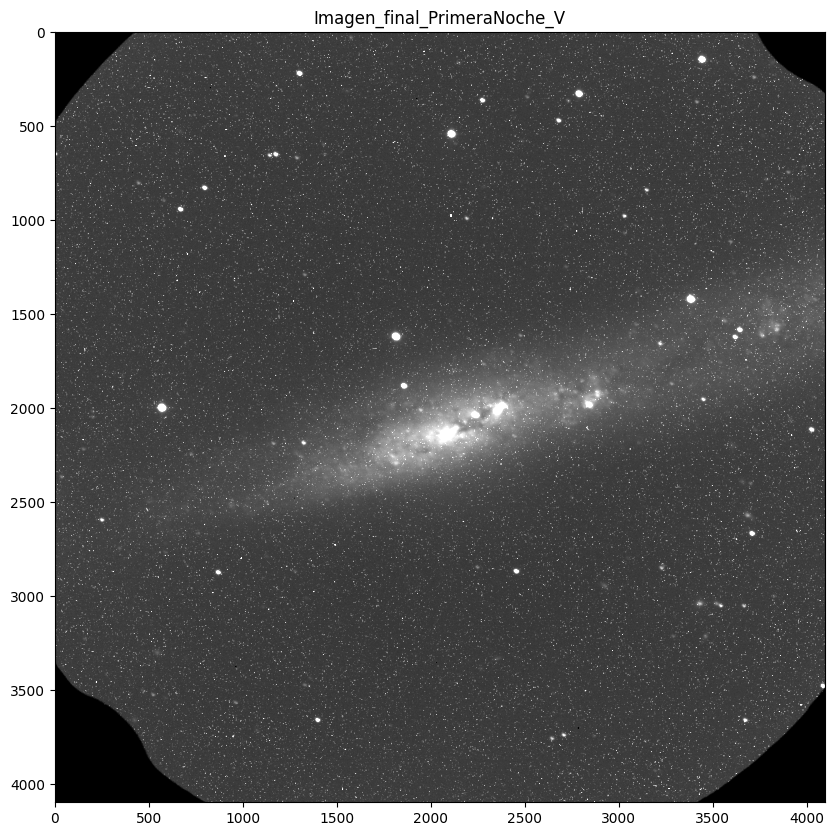

In [ ]:
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.1)
min_value,max_value=zscale.get_limits(imagen_final_PrimeraNoche)

plt.imshow(imagen_final_PrimeraNoche,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Imagen_final_PrimeraNoche_V')
#plt.savefig('Primera_Noche')
plt.show()

# 2. Astrometría

PARA B

In [45]:
#Creación de fits y astrometría
phdu=fits.PrimaryHDU(header=rawB1[0].header,data=imagen_finalB)
phdu.data=np.float32(phdu.data)

# Añadiendo parámetros al header
phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

# Transformación de coordenadas de RA y DEC
coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales
phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value

# Matriz de distorsión
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001

# Guardar el archivo fits
phdu.writeto('imagen_finalB.fit',overwrite=True)

In [46]:
B=fits.open('imagen_finalB.fit')
B[0].header    

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{453113e4-2e42-43

PARA V

In [47]:
#Creación de fits y astrometría
phdu=fits.PrimaryHDU(header=rawV1[0].header,data=imagen_finalV)
phdu.data=np.float32(phdu.data)

# Añadiendo parámetros al header
phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

# Transformación de coordenadas de RA y DEC
coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales
phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value

# Matriz de distorsión
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001

# Guardar el archivo fits
phdu.writeto('imagen_finalV.fit',overwrite=True)

In [48]:
V=fits.open('imagen_finalV.fit')
V[0].header    

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{837e18fe-938c-43

# 3. Reducción Estrellas

## HIP 277

Para B

In [18]:
#Abrimos las imágenes de ciencia de HIP 277 en flitro B, de 20 segundos de exposición
B1E1=fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000103.fit')
B2E1=fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000104.fit')
B3E1=fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000105.fit')
B4E1=fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000106.fit')
B5E1=fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000107.fit')

#Extraigamos las imágenes de B
B1E1d=B1E1[0].data
B2E1d=B2E1[0].data
B3E1d=B3E1[0].data
B4E1d=B4E1[0].data
B5E1d=B5E1[0].data

In [19]:
with fits.open('master_darkB_hip277.fit') as hdul1:
    master_darkB_HIP1 = hdul1[0].data
with fits.open('master_flatB_hip277_norm.fit') as hdul3:
    master_flatB_HIP1 = hdul3[0].data

In [20]:
epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero

#Reducción para B
BR1_E1=(B1E1d-master_darkB_HIP1)/(master_flatB_HIP1 + epsilon)
BR2_E1=(B2E1d-master_darkB_HIP1)/(master_flatB_HIP1 + epsilon)
BR3_E1=(B3E1d-master_darkB_HIP1)/(master_flatB_HIP1 + epsilon)
BR4_E1=(B4E1d-master_darkB_HIP1)/(master_flatB_HIP1 + epsilon)
BR5_E1=(B5E1d-master_darkB_HIP1)/(master_flatB_HIP1 + epsilon)

In [21]:
BE1=np.mean([BR1_E1,BR2_E1,BR3_E1,BR4_E1,BR5_E1],axis=0)*bpm
B_E1raw = np.median(np.array([B1E1[0].data, B2E1[0].data, B3E1[0].data]), axis=0)

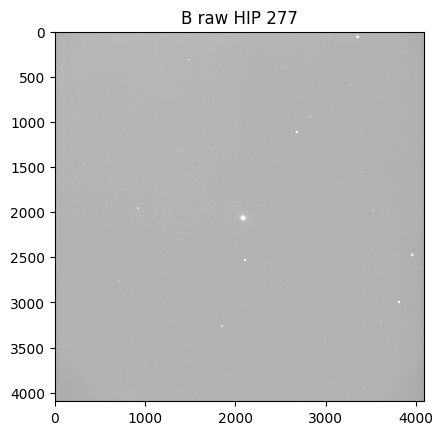

In [22]:
plt.imshow(B_E1raw, cmap='gray', vmin=0, vmax= np.mean(B_E1raw)+ np.std(B_E1raw))
plt.title('B raw HIP 277')
#plt.savefig('B raw HIP277')
plt.show()

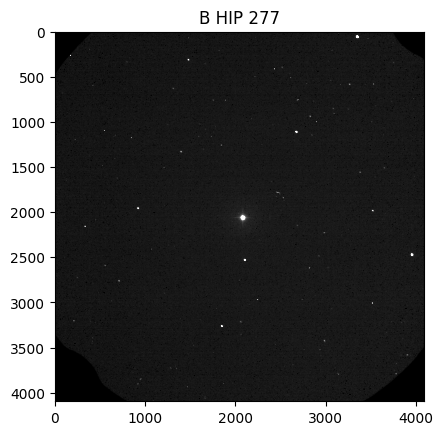

In [23]:
plt.imshow(BE1,cmap='gray',vmin=0, vmax= np.mean(BE1)+ np.std(BE1))
plt.title('B HIP 277') 
#plt.savefig('B HIP 277')
plt.show()

Para V


In [24]:
#Abrimos las imágenes de ciencia de HIP 277 en flitro V, de 5 segundos de exposición
V1E1=fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000098.fit')
V2E1=fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000099.fit')
V3E1=fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000100.fit')
V4E1=fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000101.fit')
V5E1=fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000102.fit')

#Extraigamos las imágenes de V
V1E1d=V1E1[0].data
V2E1d=V2E1[0].data
V3E1d=V3E1[0].data
V4E1d=V4E1[0].data
V5E1d=V5E1[0].data

In [25]:
with fits.open('master_darkV_hip277.fit') as hdul2:
    master_darkV_HIP1 = hdul2[0].data     
with fits.open('master_flatV_hip277_norm.fit') as hdul4:
    master_flatV_HIP1 = hdul4[0].data   

In [26]:
#Reducción para V
VR1_E1=(V1E1d-master_darkV_HIP1)/(master_flatV_HIP1 + epsilon)
VR2_E1=(V2E1d-master_darkV_HIP1)/(master_flatV_HIP1 + epsilon)
VR3_E1=(V3E1d-master_darkV_HIP1)/(master_flatV_HIP1 + epsilon)
VR4_E1=(V4E1d-master_darkV_HIP1)/(master_flatV_HIP1 + epsilon)
VR5_E1=(V5E1d-master_darkV_HIP1)/(master_flatV_HIP1 + epsilon)



In [27]:
#Reducciones
VE1=np.mean([VR1_E1,VR2_E1,VR3_E1,VR4_E1,VR5_E1],axis=0)*bpm

#Raws
V_E1raw = np.median(np.array([V1E1[0].data, V2E1[0].data, V3E1[0].data]), axis=0)

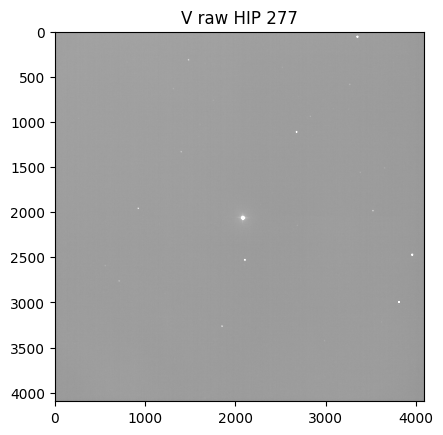

In [28]:
plt.imshow(V_E1raw, cmap='gray', vmin=0, vmax= np.mean(V_E1raw)+ np.std(V_E1raw))
plt.title('V raw HIP 277')
#plt.savefig('V raw HIP277')
plt.show()

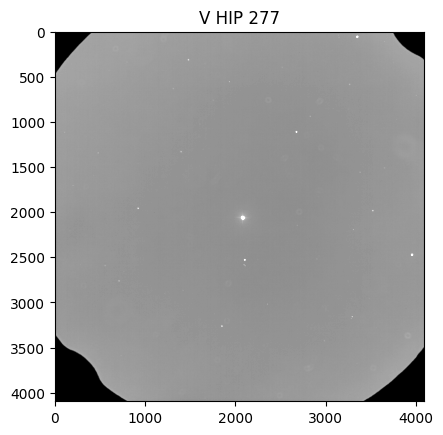

In [29]:
plt.imshow(VE1,cmap='gray',vmin=0, vmax= np.mean(VE1)+ np.std(VE1),)
plt.title('V HIP 277') 
#plt.savefig('V HIP277')
plt.show()

## HIP 1101

Para B

In [30]:
#Abrimos las imágenes de ciencia de HIP 1101 en flitro B, de 20 segundos de exposición
B1E2=fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000116.fit')
B2E2=fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000117.fit')
B3E2=fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000118.fit')
B4E2=fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000119.fit')
B5E2=fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000120.fit')


#Extraigamos las imágenes de B
B1E2d=B1E2[0].data
B2E2d=B2E2[0].data
B3E2d=B3E2[0].data
B4E2d=B4E2[0].data
B5E2d=B5E2[0].data



In [31]:
with fits.open('master_darkB_hip1101.fit') as hdul1:
    master_darkB_HIP2 = hdul1[0].data
with fits.open('master_flatB_hip1101_norm.fit') as hdul3:
    master_flatB_HIP2 = hdul3[0].data

In [32]:
#Hagámos la reducción para B
BR1_E2=(B1E2d-master_darkB_HIP2)/(master_flatB_HIP2 + epsilon)
BR2_E2=(B2E2d-master_darkB_HIP2)/(master_flatB_HIP2 + epsilon)
BR3_E2=(B3E2d-master_darkB_HIP2)/(master_flatB_HIP2 + epsilon)
BR4_E2=(B4E2d-master_darkB_HIP2)/(master_flatB_HIP2 + epsilon)
BR5_E2=(B5E2d-master_darkB_HIP2)/(master_flatB_HIP2 + epsilon)

In [33]:
BE2=np.mean([BR1_E2,BR2_E2,BR3_E2,BR4_E2,BR5_E2],axis=0)*bpm
BE2[BE2 < 0] = 0
B_E2raw = np.median(np.array([B1E2[0].data, B2E2[0].data, B3E2[0].data]), axis=0)

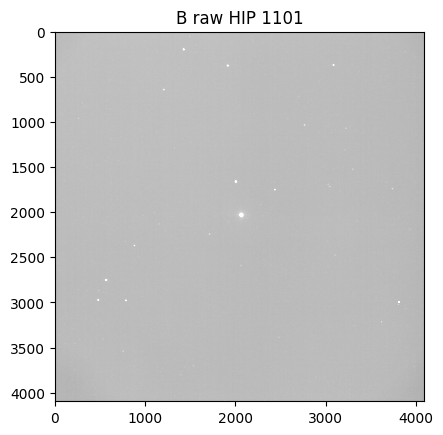

In [34]:
plt.imshow(B_E2raw, cmap='gray', vmin=0, vmax= np.mean(B_E2raw)+ np.std(B_E2raw))
plt.title('B raw HIP 1101')
#plt.savefig('B raw HIP 1101')
plt.show()

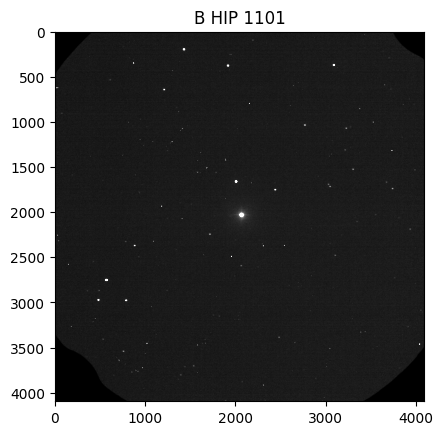

In [35]:
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(BE2)

plt.imshow(BE2,vmin=0,vmax=30,cmap='gray')
plt.title('B HIP 1101')
#plt.savefig('B HIP 1101')
plt.show()

Para V

In [36]:
#Abrimos las imágenes de ciencia de HIP1101 en flitro V, de 5 segundos de exposición
V1E2=fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000111.fit')
V2E2=fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000112.fit')
V3E2=fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000113.fit')
V4E2=fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000114.fit')
V5E2=fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000115.fit')

#Extraigamos las imágenes de V
V1E2d=V1E2[0].data
V2E2d=V2E2[0].data
V3E2d=V3E2[0].data
V4E2d=V4E2[0].data
V5E2d=V5E2[0].data

In [37]:
with fits.open('master_darkV_hip1101.fit') as hdul2:
    master_darkV_HIP2 = hdul2[0].data     
with fits.open('master_flatV_hip1101_norm.fit') as hdul4:
    master_flatV_HIP2 = hdul4[0].data  

In [38]:
#Reducción para V
VR1_E2=(V1E1d-master_darkV_HIP2)/(master_flatV_HIP2 + epsilon)
VR2_E2=(V2E1d-master_darkV_HIP2)/(master_flatV_HIP2 + epsilon)
VR3_E2=(V3E1d-master_darkV_HIP2)/(master_flatV_HIP2 + epsilon)
VR4_E2=(V4E1d-master_darkV_HIP2)/(master_flatV_HIP2 + epsilon)
VR5_E2=(V5E1d-master_darkV_HIP2)/(master_flatV_HIP2 + epsilon)

In [39]:
VE2=np.mean([VR1_E2,VR2_E2,VR3_E2,VR4_E2,VR5_E2],axis=0)*bpm
VE2[VE2 <0] = 0
V_E2raw = np.median(np.array([V1E2[0].data, V2E2[0].data, V3E2[0].data]), axis=0)

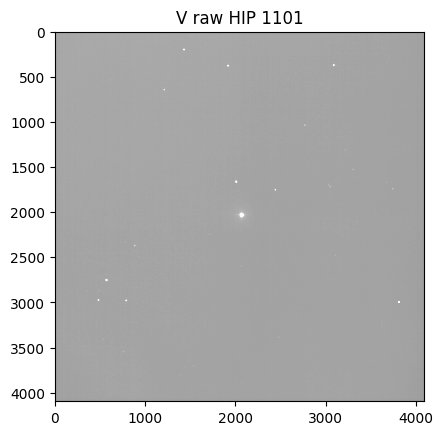

In [40]:
plt.imshow(V_E2raw, cmap='gray', vmin=0, vmax= np.mean(V_E2raw)+ np.std(V_E2raw))
plt.title('V raw HIP 1101')
#plt.savefig('V raw HIP 1101')
plt.show()

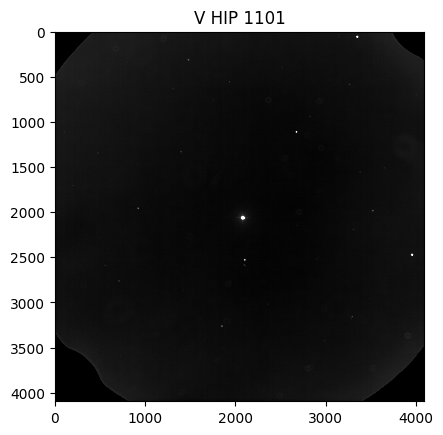

In [41]:
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(VE2)

plt.imshow(VE2,vmin=60,vmax=150,cmap='gray')
plt.title('V HIP 1101')
#plt.savefig('V HIP 1101')
plt.show()

## 4. Calibración

### Estrella HIP 277

Filtro B

Primero vemos el header

In [42]:
#Abrimos el fits
imagenE1B = fits.open('HIP 277/Light_Mouse_click_position_B_20.000secs_00000103.fit')[0]
#Extraemos la data y el header
dataE1B = imagenE1B.data*bpm
headerE1B = imagenE1B.header
headerE1B

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [43]:
dataB_E1= BE1
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(dataB_E1, nsigma=5)
#Utilizamos el umbral y la imagen para detectar fuentes
sourceBE1 = detect_sources(dataB_E1, threshold, npixels=50)
#Mostramos el número de fuentes detectadas
sourceBE1


<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 17
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]

Generamos un mapa de colores que asocia cada fuente con un color

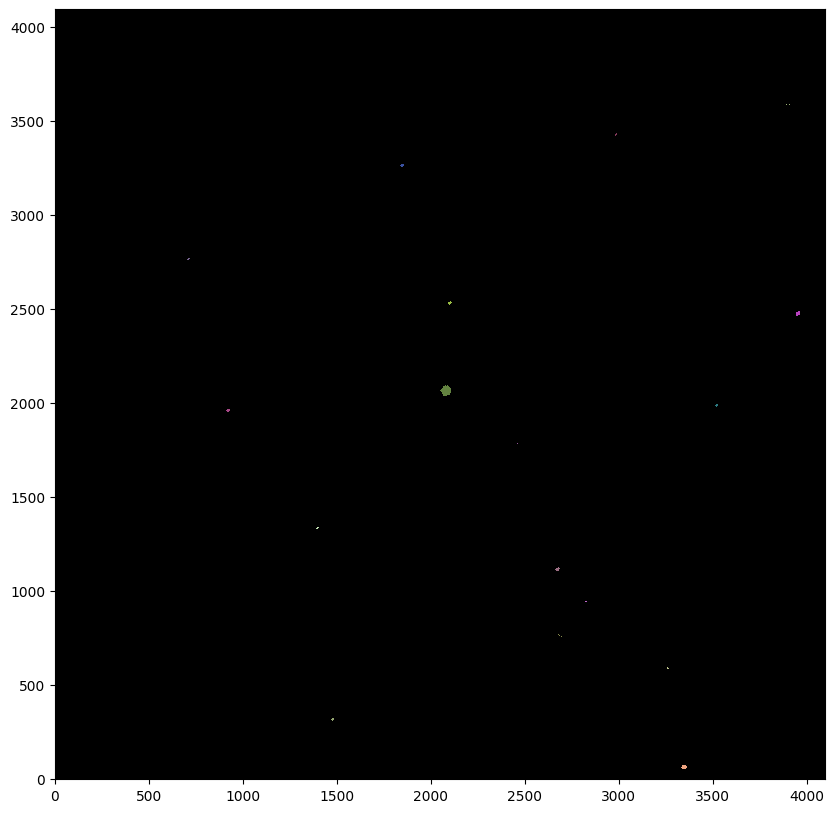

In [44]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE1 = sourceBE1.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourceBE1, origin='lower', cmap=cmap_sourE1, interpolation='nearest')
plt.savefig("Mapa de Segmentación HIP 277 Filtro B")
plt.show()

Generamos un catalogo

In [45]:
catalogoE1_B = SourceCatalog(dataB_E1, sourceBE1)
tblE1 = catalogoE1_B.to_table()
tablaB_E1 = tblE1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el flujo por el tiempo de exposición
tablaB_E1['segment_flux'] = tablaB_E1['segment_flux']/headerE1B['EXPTIME']
tablaB_E1

<QTable length=17>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 3346.3932567349975 62.995466017689495   588.0 4345.7685394270575
    2 1476.9859910348189 317.32529457021036   194.0  335.7575824282122
    3 3261.9117605544825  589.9878761375444    84.0  97.88801733674126
    4 2687.4647687840725  761.1247250211205    53.0  135.4873610239039
    5 2825.8444559628556  943.9530056818593    62.0  71.06317114140225
    6 2672.7151879645744 1115.7806988626055   335.0 1333.1681848517107
    7 1395.9435252190729 1335.4174883539308   113.0  151.4407070407116
    8 2461.2875838183377 1785.1371392293595    55.0 173.29108243595613
    9  920.1664962701375  1961.158494130921   227.0  553.3264275780803
   10  3518.169647668954  1987.859562419607   170.0  282.0871305026071
   11 2079.4900338230323 2066.4274591115723  2456.0  88721.29199285698
   12 3952.7229666784797  2475.156573999229   469.0 2967.5594784752684
   13 2100.9544379107447 2532.4906562718324   281.0  919.8335797681968
   14  709.3380400335523  2765.138927103585    98.0  117.8276609002714
   15 1847.6397127963237 3265.5857475246166   234.0   594.324379594703
   16  2983.370628528058  3427.781183296942    75.0  87.39555620358706
   17    3900.4479237763 3585.4072032971253    51.0 127.05650260188199

Se identifica la fuente con mayor area:

In [46]:
E1_B = np.argmax(tablaB_E1['area'])
tablaB_E1[E1_B]

<Row index=10>
label     xcentroid          ycentroid        area     segment_flux  
                                              pix2                   
int64      float64            float64       float64      float64     
----- ------------------ ------------------ ------- -----------------
   11 2079.4900338230323 2066.4274591115723  2456.0 88721.29199285698

In [47]:
#Obtenemos su flujo
flujoE1_B = tablaB_E1['segment_flux'][E1_B]
#Calculamos la magnitud medida
mag_E1B = -2.5*np.log(flujoE1_B)
#Obtenemos el zeropoint
zeropointE1_B = 8.53 - mag_E1B
zeropointE1_B

np.float64(37.013137961266935)

Usamos el zeropoint para corroborar la magnitud

In [48]:
tablaB_E1['magnitude'] = zeropointE1_B - 2.5*np.log(tablaB_E1['segment_flux'])
tablaB_E1[E1_B]

<Row index=10>
label     xcentroid          ycentroid        area     segment_flux       magnitude    
                                              pix2                                     
int64      float64            float64       float64      float64           float64     
----- ------------------ ------------------ ------- ----------------- -----------------
   11 2079.4900338230323 2066.4274591115723  2456.0 88721.29199285698 8.530000000000001

Filtro V

Primero abrimos el Header

In [49]:
#Abrimos el fits
imagenE1V = fits.open('HIP 277/Light_Mouse_click_position_V_5.000secs_00000098.fit')[0]
#Extraemos la data y el header
dataE1V = imagenE1V.data*bpm
headerE1V = imagenE1V.header
headerE1V

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [50]:
dataE1V = VE1
threshold = detect_threshold(dataE1V, nsigma=6)
#Detectamos las fuentes
sourceVE1 = detect_sources(dataE1V, threshold, npixels=50)
sourceVE1

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11
labels: [ 1  2  3  4  5  6  7  8  9 10 11]

Generamos un mapa de colores que asocia cada fuente con un color

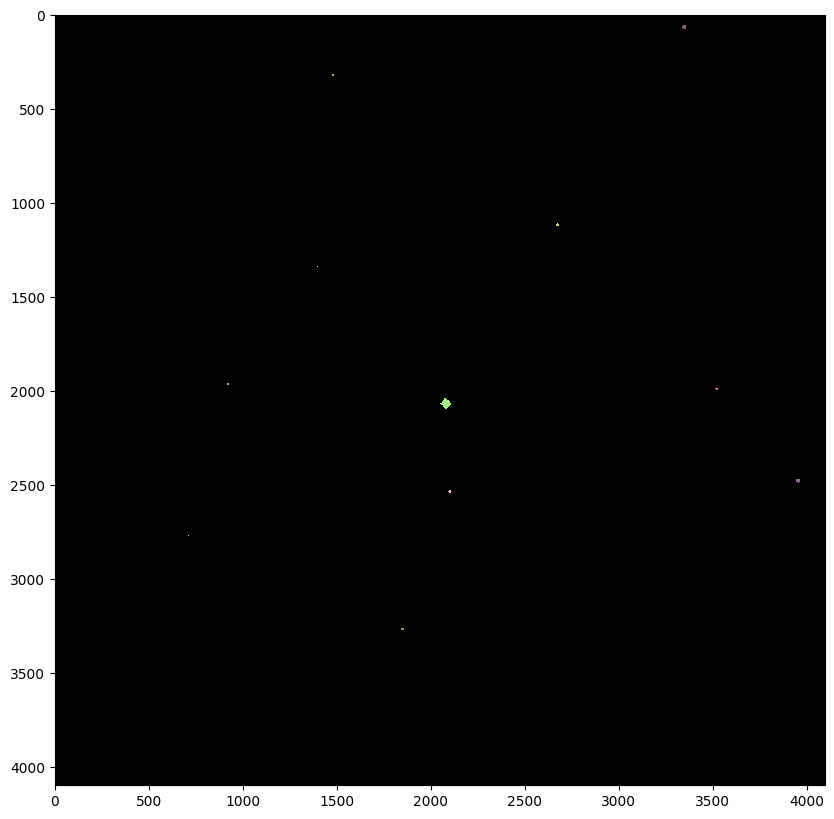

In [51]:
cmap_sourceE1_V = sourceVE1.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceVE1, cmap=cmap_sourceE1_V, interpolation='nearest')
plt.savefig("Mapa de Segmentación HIP 277 Filtro V")
plt.show()

Generamos un catalogo

In [52]:
catalogoV_E1 = SourceCatalog(dataE1V, sourceVE1)
tblV_E1 = catalogoV_E1.to_table()
tablaV_E1 = tblV_E1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el flujo por el tiempo de exposición
tablaV_E1['segment_flux'] = tablaV_E1['segment_flux']/headerE1V['EXPTIME']
tablaV_E1

<QTable length=11>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1  3346.470798487488  63.38890675526496   405.0 17972.558798795595
    2 1477.0402061060422 318.26468336661793   151.0  3101.242328134368
    3  2672.771109293248 1116.4561982130845   223.0   7372.13631821002
    4  1396.032893924522 1336.3760785884842    72.0 1415.9602394015112
    5  920.2380132816292  1961.901664374553   147.0  3332.738724747348
    6   3518.28477698682  1988.496447207314   128.0  2721.920629269668
    7  2079.655853397051 2067.0902800749514  1791.0  551088.9033791285
    8 3952.8234263903723  2475.809878332853   387.0 20158.983889623552
    9 2100.9097663312973  2532.924999562893   210.0  6599.240227190223
   10  708.8006737289919  2766.442087321486    55.0  1056.856563369363
   11   1847.47445512137  3266.351822821505   153.0  3548.017486045166

Se identifica la fuente con mayor area:

In [53]:
E1_V = np.argmax(tablaV_E1['area'])
tablaV_E1[E1_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux  
                                             pix2                   
int64      float64           float64       float64      float64     
----- ----------------- ------------------ ------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285

In [54]:
#Obtenemos su flujo
flujoE1_V = tablaV_E1['segment_flux'][E1_V]
#Calculamos la magnitud medida
mag_E1V = -2.5*np.log(flujoE1_V)
#Obtenemos el zeropoint
zeropointE1_V = 7.84 - mag_E1V
zeropointE1_V

np.float64(40.889128560662755)

In [55]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaV_E1['magnitude'] = zeropointE1_V - 2.5*np.log(tablaV_E1['segment_flux'])
tablaV_E1[E1_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux       magnitude    
                                             pix2                                     
int64      float64           float64       float64      float64           float64     
----- ----------------- ------------------ ------- ----------------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285 7.840000000000003

### Estrella HIP 1101

Primero vemos el Header

Filtro B

In [56]:
#Abrimos el fits
imagenE2B = fits.open('HIP 1101/Light_Mouse_click_position_B_20.000secs_00000116.fit')[0]
#Extraemos la data y el header
dataE2B = imagenE2B.data*bpm
headerE2B = imagenE2B.header
headerE2B

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [57]:
dataE2B= BE2
threshold = detect_threshold(dataE2B, nsigma=5)
#Detectamos las fuentes
sourceBE2 = detect_sources(dataE2B, threshold, npixels=50)
sourceBE2


<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 19
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

Generamos un mapa de colores que asocia cada fuente con un color

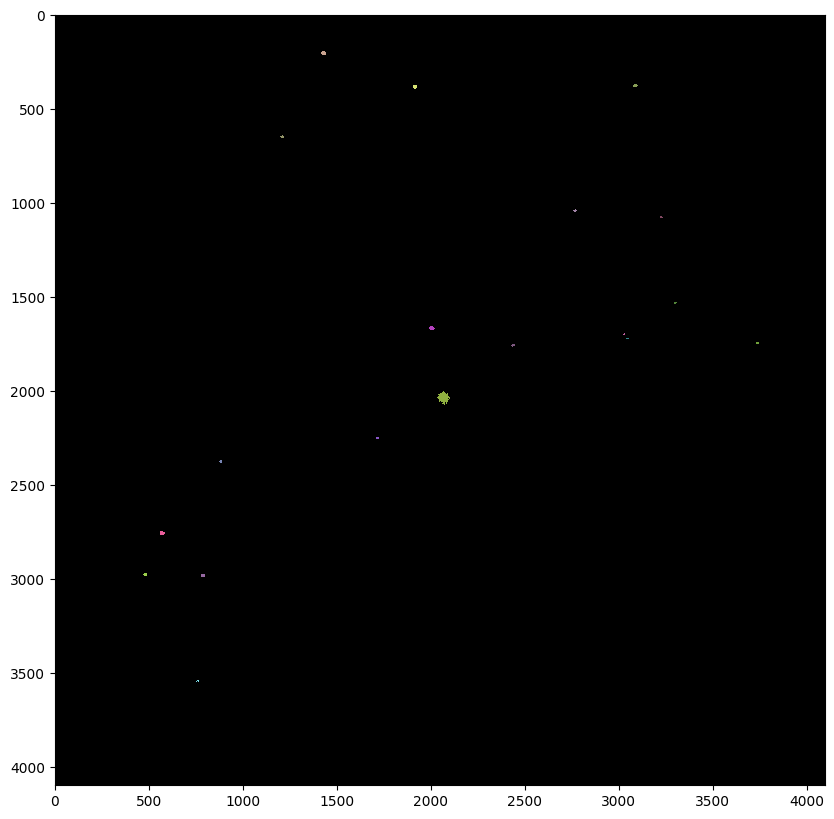

In [58]:
cmap_sourE2 = sourceBE2.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceBE2, cmap=cmap_sourE2, interpolation='nearest')
plt.savefig("Mapa de Segmentación HIP 1101 Filtro B")
plt.show()

Generamos un catalogo

In [59]:
catalogoE2_B = SourceCatalog(dataE2B, sourceBE2)
tblE2 = catalogoE2_B.to_table()
tablaB_E2 = tblE2['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el flujo por el tiempo de exposición 
tablaB_E2['segment_flux'] = tablaB_E2['segment_flux']/headerE2B['EXPTIME']
tablaB_E2

<QTable length=19>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1428.1450247448993  203.2312959614706   416.0  1610.096518698282
    2  3086.571194159106  375.5800821733441   349.0  942.9795497509722
    3 1915.3552605010746 382.02731542306407   393.0 1457.8836381491815
    4 1208.6080654467892  647.8799959279155   233.0 405.90226292239885
    5 2766.4270656989247 1040.4394000920952   187.0  281.4772132068803
    6 3224.7722536997503  1076.025905374951   113.0   128.170249105971
    7 3300.3154688477566   1530.19575199037   103.0 120.97184012661901
    8  2004.836719753361 1665.7137633789084   487.0 3036.2500660015635
    9  3028.673715889685 1696.7689522332066    57.0  56.79313731163362
   10  3045.448485115924 1720.6107235232455   112.0  126.0125491980671
   11 3737.3072122714902 1744.2985773753542   116.0  137.0565480897749
   12  2438.260554125827 1756.1789775517027   239.0 492.04614721617173
   13  2065.462603827563 2034.8954166959047  2773.0  66585.93658752355
   14 1715.0276736479875  2248.426799521755   146.0 185.40130606418808
   15  882.0502350586072 2374.5757711908223   200.0  339.3669277865175
   16  569.5255276999053 2755.2556975252114   470.0 2730.7001364837342
   17   480.804118071356  2976.524713634703   302.0  810.3189078149724
   18  788.0720996752644 2981.0023348344735   304.0  770.2767881148914
   19  758.6264869512163   3545.07941390078   103.0 112.85956610658604

Se identifica la fuente con mayor area:

In [60]:
E2_B = np.argmax(tablaB_E2['area'])
tablaB_E2[E2_B]

<Row index=12>
label     xcentroid         ycentroid        area     segment_flux  
                                             pix2                   
int64      float64           float64       float64      float64     
----- ----------------- ------------------ ------- -----------------
   13 2065.462603827563 2034.8954166959047  2773.0 66585.93658752355

In [61]:
#Flujo
flujoE2_B = tablaB_E2['segment_flux'][E2_B]
#Calculamos la magnitud
mag_E2B = -2.5*np.log(flujoE2_B)
#Obtenemos el zeropoint
zeropointE2_B = 9.29 - mag_E2B
zeropointE2_B

np.float64(37.05562167970269)

In [62]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaB_E2['magnitude'] = zeropointE2_B - 2.5*np.log(tablaB_E2['segment_flux'])
tablaB_E2[E2_B]

<Row index=12>
label     xcentroid         ycentroid        area     segment_flux   magnitude
                                             pix2                             
int64      float64           float64       float64      float64       float64 
----- ----------------- ------------------ ------- ----------------- ---------
   13 2065.462603827563 2034.8954166959047  2773.0 66585.93658752355      9.29

Filtro V

In [63]:
#Abrimos el fits
imagenE2V = fits.open('HIP 1101/Light_Mouse_click_position_V_5.000secs_00000111.fit')[0]
#Extraemos la data y el header
dataE2V = imagenE2V.data*bpm
headerE2V = imagenE2V.header
headerE2V

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [64]:
dataE2V = VE2
threshold = detect_threshold(dataE2V, nsigma=6)
#Detectamos las fuentes
sourceVE2 = detect_sources(dataE2V, threshold, npixels=50)
sourceVE2

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11
labels: [ 1  2  3  4  5  6  7  8  9 10 11]

Generamos un mapa de colores que asocia cada fuente con un color

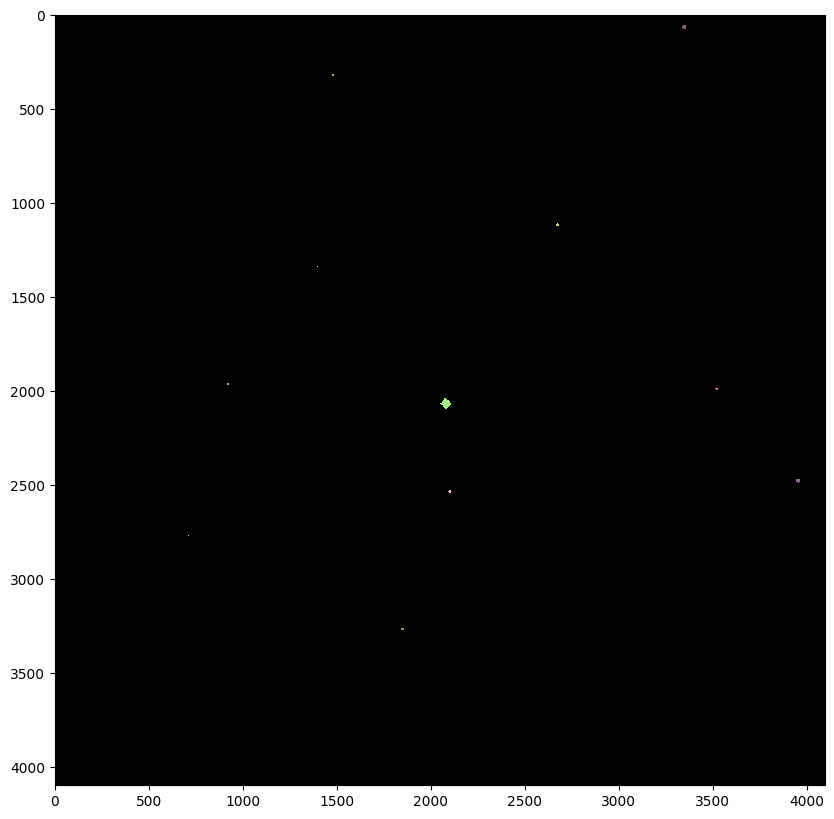

In [65]:
cmap_sourceE2_V = sourceVE2.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceVE2, cmap=cmap_sourceE2_V, interpolation='nearest')
plt.savefig("Mapa de Segmentación HIP 1101 Filtro V")
plt.show()

Generamos un catalogo

In [66]:
catalogoE2_V = SourceCatalog(dataE2V, sourceVE2)
tblE2V = catalogoE2_V.to_table()
tablaV_E2 = tblE2V['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el "flujo" por el tiempo de exposición 
tablaV_E2['segment_flux'] = tablaV_E2['segment_flux']/headerE2V['EXPTIME']
tablaV_E2

<QTable length=11>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1  3346.470798487488  63.38890675526496   405.0 17972.558798795595
    2 1477.0402061060422 318.26468336661793   151.0  3101.242328134368
    3  2672.771109293248 1116.4561982130845   223.0   7372.13631821002
    4  1396.032893924522 1336.3760785884842    72.0 1415.9602394015112
    5  920.2380132816292  1961.901664374553   147.0  3332.738724747348
    6   3518.28477698682  1988.496447207314   128.0  2721.920629269668
    7  2079.655853397051 2067.0902800749514  1791.0  551088.9033791285
    8 3952.8234263903723  2475.809878332853   387.0 20158.983889623552
    9 2100.9097663312973  2532.924999562893   210.0  6599.240227190223
   10  708.8006737289919  2766.442087321486    55.0  1056.856563369363
   11   1847.47445512137  3266.351822821505   153.0  3548.017486045166

Se identifica la fuente con mayor área:

In [67]:
E2_V = np.argmax(tablaV_E2['area'])
tablaV_E2[E2_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux  
                                             pix2                   
int64      float64           float64       float64      float64     
----- ----------------- ------------------ ------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285

In [68]:
#flujo
flujoE2_V = tablaV_E2['segment_flux'][E2_V]
#Magnitud medida
mag_E2V = -2.5*np.log(flujoE2_V)
#Obtenemos el zeropoint
zeropointE2_V = 8.77 - mag_E2V
zeropointE2_V

np.float64(41.81912856066275)

In [69]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaV_E2['magnitude'] = zeropointE2_V - 2.5*np.log(tablaV_E2['segment_flux'])
tablaV_E2[E2_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux       magnitude    
                                             pix2                                     
int64      float64           float64       float64      float64           float64     
----- ----------------- ------------------ ------- ----------------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285 8.769999999999996

# 5. Catálogo 

## ZERO POINT B 

### Sin deblend

Primero vemos el Header

In [70]:
#Abrimos el fits
imagen1 = fits.open('Grupo 5/Light_Mouse_click_position_B_900.000secs_00000051.fit')[0]
#Extraemos la data y el header
header1 = imagen1.header
header1

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [71]:
#Extraemos la data de la imagen reducida
with fits.open('imagen_finalB.fit') as hdul:
    imagen_finalB=hdul[0].data
threshold = detect_threshold(imagen_finalB, nsigma=1)
#Detectamos las fuentes
sourceNGC55B = detect_sources(imagen_finalB, threshold, npixels=50)
sourceNGC55B

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1142
labels: [   1    2    3    4    5 ... 1138 1139 1140 1141 1142]

Generamos un mapa de colores que asocia cada fuente con un color

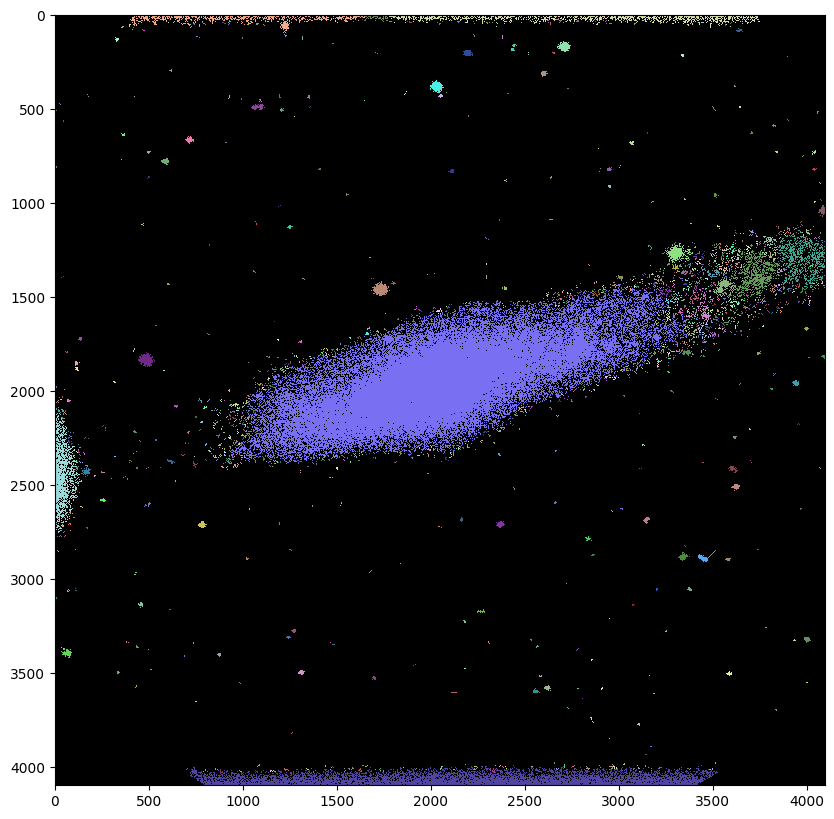

In [72]:
cmap_sourceNGC55_B = sourceNGC55B.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourceNGC55B, cmap=cmap_sourceNGC55_B, interpolation='nearest')
plt.savefig('Mapa de Segmentación NGC 55 B Sin deblend')
plt.show()

In [73]:
catalogoNGC55_B = SourceCatalog(imagen_finalB, sourceNGC55B)
tbl = catalogoNGC55_B.to_table()
tablaNGC55B = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55B['segment_flux'] = tablaNGC55B['segment_flux']/header1['EXPTIME']
tablaNGC55B

<QTable length=1142>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1003.2155732925148  20.33878745888372 22063.0  6852.314918162028
    2 1716.1219906858876 11.921972780614977  1497.0  443.1835940551758
    3  2864.034930521364  16.23350517605329 32934.0 10095.578061303033
    4 2571.2141736054746  5.127874598653397   108.0  33.13400702582465
    5  1636.104340844599 24.055860110419676    73.0 26.254609544542102
    6 2674.3870606309674  21.37541093489375   117.0  36.04494625515408
    7   1499.27756777504  31.24941755442815   113.0 45.036634809705944
    8 1649.4355510933692 24.833745202652853    77.0   22.7457251824273
    9 1285.1472107496957 30.905265020868484    61.0 16.525187276204427
  ...                ...                ...     ...                ...
 1134  985.6495590314604 4019.7639096482417    94.0 31.710983174641928
 1135 1150.8016919106742  4019.569153909491    98.0 26.998209211561417
 1136  793.9560435784034 4021.0718746402185    80.0 27.172386779785157
 1137  1170.031664281241  4019.958552581746    59.0 17.499652082655164
 1138  1115.549614027655 4025.2388878345228    93.0 27.489213138156465
 1139 1377.4110832468189 4022.5758924020497    89.0  25.01147710164388
 1140 3228.8880240520566 4021.1783080748855    52.0 14.267414855957032
 1141  807.5080270125192  4025.997663425184    50.0  13.97291283501519
 1142 1050.0307188989134 4028.2476420212297    57.0   18.6961592441135

Flujo con respecto a estrella HIP 277

In [74]:
tablaNGC55B['magnitude'] = zeropointE1_B - 2.5*np.log(tablaNGC55B['segment_flux'])
tablaNGC55B

<QTable length=1142>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1003.2155732925148 ...  6852.314918162028 14.932283415208929
    2 1716.1219906858876 ...  443.1835940551758  21.77817766695592
    3  2864.034930521364 ... 10095.578061303033 13.963505983148192
    4 2571.2141736054746 ...  33.13400702582465 28.261737567369238
    5  1636.104340844599 ... 26.254609544542102  28.84353402297118
    6 2674.3870606309674 ...  36.04494625515408   28.0512212942498
    7   1499.27756777504 ... 45.036634809705944 27.494447297648406
    8 1649.4355510933692 ...   22.7457251824273 29.202194902087815
    9 1285.1472107496957 ... 16.525187276204427  30.00092366482827
  ...                ... ...                ...                ...
 1134  985.6495590314604 ... 31.710983174641928 28.371480228112638
 1135 1150.8016919106742 ... 26.998209211561417 28.773711615499508
 1136  793.9560435784034 ... 27.172386779785157  28.75763479695206
 1137  1170.031664281241 ... 17.499652082655164  29.85768546191517
 1138  1115.549614027655 ... 27.489213138156465 28.728653765764495
 1139 1377.4110832468189 ...  25.01147710164388 28.964800952299168
 1140 3228.8880240520566 ... 14.267414855957032 30.368192321969175
 1141  807.5080270125192 ...  13.97291283501519 30.420336316322217
 1142 1050.0307188989134 ...   18.6961592441135   29.6923426743914

In [75]:
NGC55B = np.argmax(tablaNGC55B['area']) 
mag_aparente_BE1 = tablaNGC55B['magnitude'][NGC55B]
mag_aparente_BE1

np.float64(5.7643719062829994)

FLUJO ESTRELLA HIP1101

In [76]:
tablaNGC55B['magnitude'] = zeropointE2_B - 2.5*np.log(tablaNGC55B['segment_flux'])
tablaNGC55B

<QTable length=1142>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1003.2155732925148 ...  6852.314918162028 14.974767133644683
    2 1716.1219906858876 ...  443.1835940551758 21.820661385391674
    3  2864.034930521364 ... 10095.578061303033 14.005989701583946
    4 2571.2141736054746 ...  33.13400702582465 28.304221285804992
    5  1636.104340844599 ... 26.254609544542102 28.886017741406935
    6 2674.3870606309674 ...  36.04494625515408 28.093705012685554
    7   1499.27756777504 ... 45.036634809705944  27.53693101608416
    8 1649.4355510933692 ...   22.7457251824273  29.24467862052357
    9 1285.1472107496957 ... 16.525187276204427 30.043407383264025
  ...                ... ...                ...                ...
 1134  985.6495590314604 ... 31.710983174641928 28.413963946548392
 1135 1150.8016919106742 ... 26.998209211561417 28.816195333935262
 1136  793.9560435784034 ... 27.172386779785157 28.800118515387815
 1137  1170.031664281241 ... 17.499652082655164 29.900169180350925
 1138  1115.549614027655 ... 27.489213138156465  28.77113748420025
 1139 1377.4110832468189 ...  25.01147710164388 29.007284670734922
 1140 3228.8880240520566 ... 14.267414855957032  30.41067604040493
 1141  807.5080270125192 ...  13.97291283501519  30.46282003475797
 1142 1050.0307188989134 ...   18.6961592441135 29.734826392827156

In [77]:
NGC55 = np.argmax(tablaNGC55B['area']) 
mag_aparente_BE2 = tablaNGC55B['magnitude'][NGC55B]
mag_aparente_BE2

np.float64(5.806855624718754)

### Deblend 

In [78]:
#Usamos la 'deblend_sources' para separar las fuentes
source_deblendB = deblend_sources(imagen_finalB, sourceNGC55B, npixels=50, nlevels=2 ,contrast=0)
source_deblendB 

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1142
labels: [   1    2    3    4    5 ... 1138 1139 1140 1141 1142]

Volvemos a generar el mapa de colores

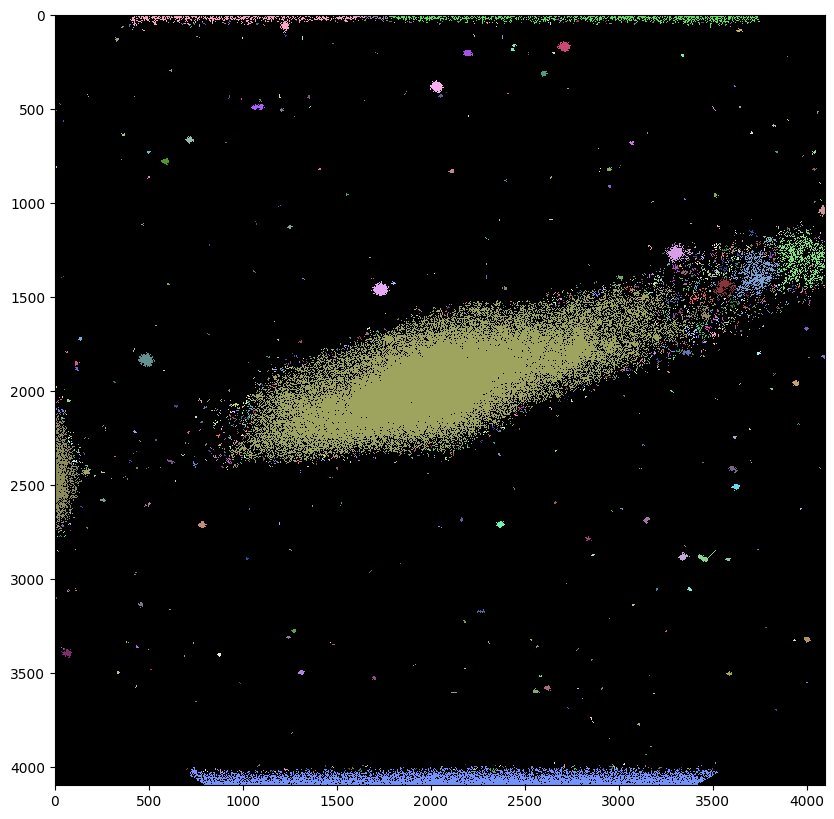

In [79]:
cmap_deblendB = source_deblendB.make_cmap(seed=150)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(source_deblendB, cmap=cmap_deblendB,interpolation='nearest')
plt.savefig('Mapa de Segmentación NGC 55 B con deblend')
plt.show()

Generamos el catalogo

In [80]:
catalogoNGC55_B = SourceCatalog(imagen_finalB, source_deblendB)
tbl = catalogoNGC55_B.to_table()
tablaNGC55B_d = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55B_d['segment_flux'] = tablaNGC55B_d['segment_flux']/header1['EXPTIME']
tablaNGC55B_d

<QTable length=1142>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1003.2155732925148  20.33878745888372 22063.0  6852.314918162028
    2 1716.1219906858876 11.921972780614977  1497.0  443.1835940551758
    3  2864.034930521364  16.23350517605329 32934.0 10095.578061303033
    4 2571.2141736054746  5.127874598653397   108.0  33.13400702582465
    5  1636.104340844599 24.055860110419676    73.0 26.254609544542102
    6 2674.3870606309674  21.37541093489375   117.0  36.04494625515408
    7   1499.27756777504  31.24941755442815   113.0 45.036634809705944
    8 1649.4355510933692 24.833745202652853    77.0   22.7457251824273
    9 1285.1472107496957 30.905265020868484    61.0 16.525187276204427
  ...                ...                ...     ...                ...
 1134  985.6495590314604 4019.7639096482417    94.0 31.710983174641928
 1135 1150.8016919106742  4019.569153909491    98.0 26.998209211561417
 1136  793.9560435784034 4021.0718746402185    80.0 27.172386779785157
 1137  1170.031664281241  4019.958552581746    59.0 17.499652082655164
 1138  1115.549614027655 4025.2388878345228    93.0 27.489213138156465
 1139 1377.4110832468189 4022.5758924020497    89.0  25.01147710164388
 1140 3228.8880240520566 4021.1783080748855    52.0 14.267414855957032
 1141  807.5080270125192  4025.997663425184    50.0  13.97291283501519
 1142 1050.0307188989134 4028.2476420212297    57.0   18.6961592441135

FLUJO ESTRELLA HIP 277

In [81]:
d1E1 = tablaNGC55B_d
d1E1['magnitude'] = zeropointE1_B - 2.5*np.log(d1E1['segment_flux'])
d1E1

<QTable length=1142>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1003.2155732925148 ...  6852.314918162028 14.932283415208929
    2 1716.1219906858876 ...  443.1835940551758  21.77817766695592
    3  2864.034930521364 ... 10095.578061303033 13.963505983148192
    4 2571.2141736054746 ...  33.13400702582465 28.261737567369238
    5  1636.104340844599 ... 26.254609544542102  28.84353402297118
    6 2674.3870606309674 ...  36.04494625515408   28.0512212942498
    7   1499.27756777504 ... 45.036634809705944 27.494447297648406
    8 1649.4355510933692 ...   22.7457251824273 29.202194902087815
    9 1285.1472107496957 ... 16.525187276204427  30.00092366482827
  ...                ... ...                ...                ...
 1134  985.6495590314604 ... 31.710983174641928 28.371480228112638
 1135 1150.8016919106742 ... 26.998209211561417 28.773711615499508
 1136  793.9560435784034 ... 27.172386779785157  28.75763479695206
 1137  1170.031664281241 ... 17.499652082655164  29.85768546191517
 1138  1115.549614027655 ... 27.489213138156465 28.728653765764495
 1139 1377.4110832468189 ...  25.01147710164388 28.964800952299168
 1140 3228.8880240520566 ... 14.267414855957032 30.368192321969175
 1141  807.5080270125192 ...  13.97291283501519 30.420336316322217
 1142 1050.0307188989134 ...   18.6961592441135   29.6923426743914

Se identifica la fuente de mayor área, o sea la Galaxia.

In [82]:
NGC55_D1 = np.argmax(d1E1['area']) 

#MAGNITUD APARENTE
mag_deblend_BE1 = d1E1['magnitude'][NGC55_D1] # buscamos el flujo de "estrella" (el flujo de aquella fuente con mayor area)
mag_deblend_BE1

np.float64(5.7643719062829994)

FLUJO ESTRELLA HIP1101

In [83]:
d1E2 = tablaNGC55B_d
d1E2['magnitude'] = zeropointE2_B - 2.5*np.log(d1E2['segment_flux'])
d1E2

<QTable length=1142>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1003.2155732925148 ...  6852.314918162028 14.974767133644683
    2 1716.1219906858876 ...  443.1835940551758 21.820661385391674
    3  2864.034930521364 ... 10095.578061303033 14.005989701583946
    4 2571.2141736054746 ...  33.13400702582465 28.304221285804992
    5  1636.104340844599 ... 26.254609544542102 28.886017741406935
    6 2674.3870606309674 ...  36.04494625515408 28.093705012685554
    7   1499.27756777504 ... 45.036634809705944  27.53693101608416
    8 1649.4355510933692 ...   22.7457251824273  29.24467862052357
    9 1285.1472107496957 ... 16.525187276204427 30.043407383264025
  ...                ... ...                ...                ...
 1134  985.6495590314604 ... 31.710983174641928 28.413963946548392
 1135 1150.8016919106742 ... 26.998209211561417 28.816195333935262
 1136  793.9560435784034 ... 27.172386779785157 28.800118515387815
 1137  1170.031664281241 ... 17.499652082655164 29.900169180350925
 1138  1115.549614027655 ... 27.489213138156465  28.77113748420025
 1139 1377.4110832468189 ...  25.01147710164388 29.007284670734922
 1140 3228.8880240520566 ... 14.267414855957032  30.41067604040493
 1141  807.5080270125192 ...  13.97291283501519  30.46282003475797
 1142 1050.0307188989134 ...   18.6961592441135 29.734826392827156

In [84]:
#magnitud aparente 
mag_deblend_BE2 = d1E2['magnitude'][NGC55_D1]
mag_deblend_BE2

np.float64(5.806855624718754)

## ZERO POINT V

### Sin deblend

Primero vemos el Header

In [85]:
#Abrimos el fits
imagen2 = fits.open('Grupo 5/Light_Mouse_click_position_V_600.000secs_00000048.fit')[0]
#Extraemos la data y el header
header2 = imagen2.header
header2

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [86]:
with fits.open('imagen_finalV.fit') as hdul:
    imagen_finalV=hdul[0].data
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(imagen_finalV, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourceNGC55V = detect_sources(imagen_finalV, threshold, npixels=50)
#Mostramos el número de fuentes detectadas
sourceNGC55V

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 720
labels: [  1   2   3   4   5 ... 716 717 718 719 720]

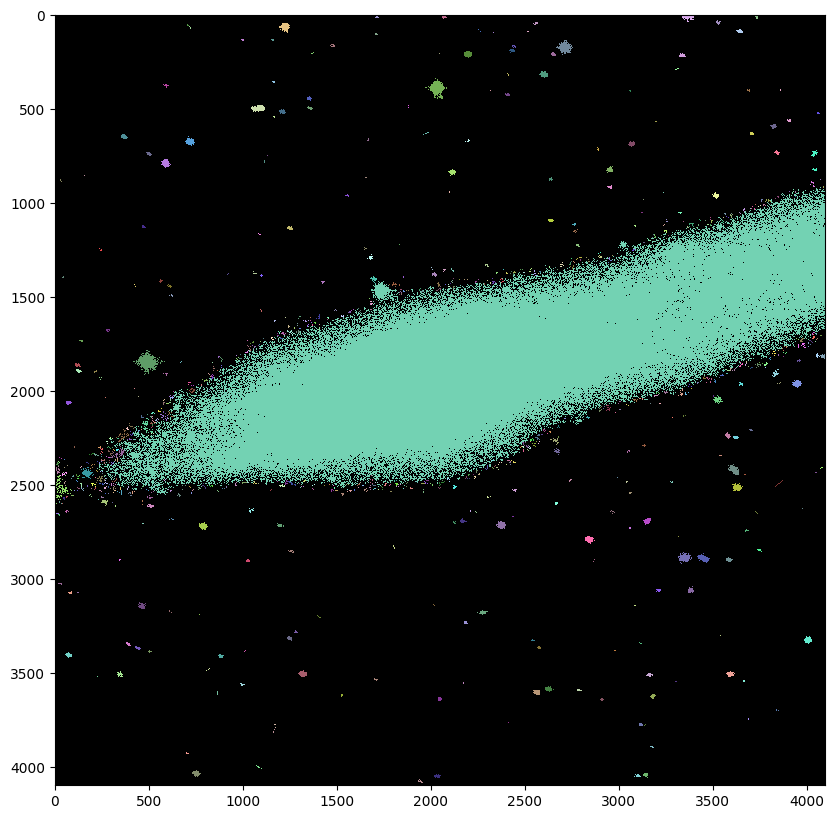

In [87]:
#Mapa de colores que asocia un color a cada fuente
cmap_sourceV = sourceNGC55V.make_cmap(seed=150)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourceNGC55V, cmap=cmap_sourceV, interpolation='nearest')
plt.savefig('Mapa de Segmentación NGC 55 V sin deblend')
plt.show()

In [88]:
#Obtenemos el catálogo
catalogoNGC55_V = SourceCatalog(imagen_finalV, sourceNGC55V)
#Lo pasamos a tabla y lo mostramos
tbl = catalogoNGC55_V.to_table()
tablaNGC55V = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55V['segment_flux'] = tablaNGC55V['segment_flux']/header2['EXPTIME']
tablaNGC55V

<QTable length=720>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1  2069.784011724665   8.35456183158563   395.0    69.528854637146
    2 3366.5201991217336  7.794497703169149  1407.0 431.08790250142414
    3  3731.729914702695 10.365114392028431   198.0 31.066951904296875
    4 1713.6386479436558 13.710462568471355   200.0 31.164771105448406
    5  3526.329731092704 39.725021788695976   278.0  55.81947504679362
    6  2557.803808826879  43.86937305934238   231.0 39.124146957397464
    7 1223.1764100721186  65.06345437436626  1821.0  909.8183436965942
    8  704.3803535007761  54.95421620127125    99.0 14.727395477294921
    9  719.9644497561906  66.68028033118435   149.0 25.173587977091472
  ...                ...                ...     ...                ...
  712 1165.0082647436864 3807.3433161592307    83.0 23.792896245320637
  713  3177.029938730246 3894.6294277022885   154.0 35.330738652547204
  714  704.4934999802427 3926.6220329395037   102.0 14.966770553588868
  715 1083.5775155391011 3998.8092588662475   139.0  43.65657850901286
  716  751.1145665209893 4034.2361306295275  1046.0 288.40749740600586
  717 3142.5597546259246  4043.374090944487   546.0 115.72006796518961
  718 2033.2773798643595  4048.761182091301   580.0 114.65792163848877
  719  3099.310871778556 4047.4179893913324   298.0  52.44328492482503
  720  1943.324109996613  4076.882443381617   263.0  40.67468844095866

ESTRELLA HIP 277

In [89]:
tablaNGC55V['magnitude'] = zeropointE1_V - 2.5*np.log(tablaNGC55V['segment_flux'])
tablaNGC55V

<QTable length=720>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1  2069.784011724665 ...    69.528854637146 30.284773958050756
    2 3366.5201991217336 ... 431.08790250142414 25.723348512092596
    3  3731.729914702695 ... 31.066951904296875  32.29876702453758
    4 1713.6386479436558 ... 31.164771105448406 32.290907746585575
    5  3526.329731092704 ...  55.81947504679362  30.83382150148488
    6  2557.803808826879 ... 39.124146957397464 31.722278946620722
    7 1223.1764100721186 ...  909.8183436965942 23.856016167482068
    8  704.3803535007761 ... 14.727395477294921  34.16485506746943
    9  719.9644497561906 ... 25.173587977091472  32.82464018882934
  ...                ... ...                ...                ...
  712 1165.0082647436864 ... 23.792896245320637  32.96566091307048
  713  3177.029938730246 ... 35.330738652547204 31.977245139698628
  714  704.4934999802427 ... 14.966770553588868 34.124547442473364
  715 1083.5775155391011 ...  43.65657850901286  31.44824360733488
  716  751.1145665209893 ... 288.40749740600586 26.728192556596987
  717 3142.5597546259246 ... 115.72006796518961 29.011193392082134
  718 2033.2773798643595 ... 114.65792163848877 29.034245808121852
  719  3099.310871778556 ...  52.44328492482503 30.989797814361133
  720  1943.324109996613 ...  40.67468844095866 31.625113577269058

In [90]:
# Galaxia, que es la fuente con mayor area
NGC55V = np.argmax(tablaNGC55V['area']) 
mag_aparente_VE1 = tablaNGC55V['magnitude'][NGC55V]
mag_aparente_VE1

np.float64(7.952354368503421)

Flujo con respectro a la estrella HIP 1101

In [91]:
tablaNGC55V['magnitude'] = zeropointE2_V - 2.5*np.log(tablaNGC55V['segment_flux'])
tablaNGC55V

<QTable length=720>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1  2069.784011724665 ...    69.528854637146  31.21477395805075
    2 3366.5201991217336 ... 431.08790250142414 26.653348512092588
    3  3731.729914702695 ... 31.066951904296875 33.228767024537575
    4 1713.6386479436558 ... 31.164771105448406  33.22090774658557
    5  3526.329731092704 ...  55.81947504679362 31.763821501484873
    6  2557.803808826879 ... 39.124146957397464  32.65227894662071
    7 1223.1764100721186 ...  909.8183436965942  24.78601616748206
    8  704.3803535007761 ... 14.727395477294921 35.094855067469425
    9  719.9644497561906 ... 25.173587977091472 33.754640188829335
  ...                ... ...                ...                ...
  712 1165.0082647436864 ... 23.792896245320637  33.89566091307047
  713  3177.029938730246 ... 35.330738652547204  32.90724513969862
  714  704.4934999802427 ... 14.966770553588868  35.05454744247336
  715 1083.5775155391011 ...  43.65657850901286  32.37824360733487
  716  751.1145665209893 ... 288.40749740600586  27.65819255659698
  717 3142.5597546259246 ... 115.72006796518961 29.941193392082127
  718 2033.2773798643595 ... 114.65792163848877 29.964245808121845
  719  3099.310871778556 ...  52.44328492482503 31.919797814361125
  720  1943.324109996613 ...  40.67468844095866 32.555113577269054

In [92]:
NGC55V = np.argmax(tablaNGC55V['area']) 
mag_aparente_VE2 = tablaNGC55V['magnitude'][NGC55V]
mag_aparente_VE2

np.float64(8.882354368503414)

### Deblend 

In [93]:
#Usamos la función mencionada para separar las fuentes
source_deblendV = deblend_sources(imagen_finalV, sourceNGC55V, npixels=50, nlevels=2 ,contrast=0)
source_deblendV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 729
labels: [  1   2   3   4   5 ... 725 726 727 728 729]

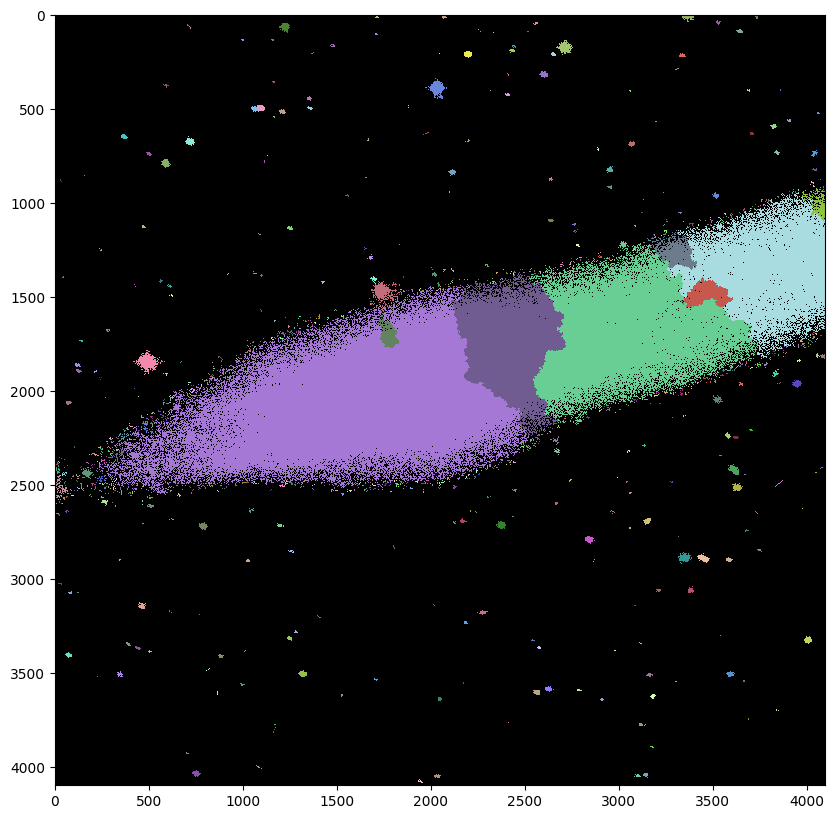

In [94]:
cmap_deblendV = source_deblendV.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(source_deblendV, cmap=cmap_deblendV,interpolation='nearest')
plt.savefig('Mapa de Segmentación NGC 55 V Con deblend')
plt.show()

In [95]:
catalogoNGC55_V = SourceCatalog(imagen_finalV, source_deblendV)
tbl = catalogoNGC55_V.to_table()
tablaNGC55V_d = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55V_d['segment_flux'] = tablaNGC55V_d['segment_flux']/header2['EXPTIME']
tablaNGC55V_d

<QTable length=729>
label     xcentroid          ycentroid         area      segment_flux   
                                               pix2                     
int64      float64            float64        float64       float64      
----- ------------------ ------------------ --------- ------------------
    1  2069.784011724665   8.35456183158563     395.0    69.528854637146
    2 3366.5201991217336  7.794497703169149    1407.0 431.08790250142414
    3  3731.729914702695 10.365114392028431     198.0 31.066951904296875
    4 1713.6386479436558 13.710462568471355     200.0 31.164771105448406
    5  3526.329731092704 39.725021788695976     278.0  55.81947504679362
    6  2557.803808826879  43.86937305934238     231.0 39.124146957397464
    7 1223.1764100721186  65.06345437436626    1821.0  909.8183436965942
    8  704.3803535007761  54.95421620127125      99.0 14.727395477294921
    9  719.9644497561906  66.68028033118435     149.0 25.173587977091472
  ...                ...                ...       ...                ...
  721   4066.82328665075 1017.8416246255678    8175.0 2314.7858797709146
  722  3303.622943010674  1265.480695216011   23647.0  9935.952594451905
  723 3781.0539556184226 1357.0149258978008  384317.0  68170.30459845225
  724  1737.270717155014  1469.913585027394    8478.0  5652.492717272441
  725 3472.9381672276268 1484.8508032980346   23783.0  4484.754069658915
  726 1774.0547190139048 1707.8676031441144   10833.0  2997.595075874329
  727 3042.5341013219677 1702.7623727360606  594544.0 108858.71678198497
  728 2407.9448233616135 1769.4445586731852  286399.0  66464.55496344248
  729  1602.359850875529 2073.6466221811397 1202513.0  257991.1378855896

FLUJO ESTRELLA HIP 277

In [96]:
d2E1 = tablaNGC55V_d
d2E1['magnitude'] = zeropointE1_V - 2.5*np.log(d2E1['segment_flux'])
d2E1

<QTable length=729>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1  2069.784011724665 ...    69.528854637146 30.284773958050756
    2 3366.5201991217336 ... 431.08790250142414 25.723348512092596
    3  3731.729914702695 ... 31.066951904296875  32.29876702453758
    4 1713.6386479436558 ... 31.164771105448406 32.290907746585575
    5  3526.329731092704 ...  55.81947504679362  30.83382150148488
    6  2557.803808826879 ... 39.124146957397464 31.722278946620722
    7 1223.1764100721186 ...  909.8183436965942 23.856016167482068
    8  704.3803535007761 ... 14.727395477294921  34.16485506746943
    9  719.9644497561906 ... 25.173587977091472  32.82464018882934
  ...                ... ...                ...                ...
  721   4066.82328665075 ... 2314.7858797709146  21.52144738640507
  722  3303.622943010674 ...  9935.952594451905  17.87934097798252
  723 3781.0539556184226 ...  68170.30459845225 13.064717729249487
  724  1737.270717155014 ...  5652.492717272441  19.28949877130511
  725 3472.9381672276268 ...  4484.754069658915   19.8680312131061
  726 1774.0547190139048 ...  2997.595075874329  20.87521454869087
  727 3042.5341013219677 ... 108858.71678198497 11.894613200322496
  728 2407.9448233616135 ...  66464.55496344248 13.128068369472466
  729  1602.359850875529 ...  257991.1378855896  9.737427275579897

In [97]:
NGC55_D2 = np.argmax(d2E1['area']) 

#MAGNITUD APARENTE
mag_deblend_VE1 = d2E1['magnitude'][NGC55_D2] 
mag_deblend_VE1

np.float64(9.737427275579897)

ESTRELLA HIP 1101

In [98]:
d2E2 = tablaNGC55V_d
d2E2['magnitude'] = zeropointE2_V - 2.5*np.log(d2E2['segment_flux'])
d2E2

<QTable length=729>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1  2069.784011724665 ...    69.528854637146  31.21477395805075
    2 3366.5201991217336 ... 431.08790250142414 26.653348512092588
    3  3731.729914702695 ... 31.066951904296875 33.228767024537575
    4 1713.6386479436558 ... 31.164771105448406  33.22090774658557
    5  3526.329731092704 ...  55.81947504679362 31.763821501484873
    6  2557.803808826879 ... 39.124146957397464  32.65227894662071
    7 1223.1764100721186 ...  909.8183436965942  24.78601616748206
    8  704.3803535007761 ... 14.727395477294921 35.094855067469425
    9  719.9644497561906 ... 25.173587977091472 33.754640188829335
  ...                ... ...                ...                ...
  721   4066.82328665075 ... 2314.7858797709146 22.451447386405064
  722  3303.622943010674 ...  9935.952594451905  18.80934097798251
  723 3781.0539556184226 ...  68170.30459845225  13.99471772924948
  724  1737.270717155014 ...  5652.492717272441   20.2194987713051
  725 3472.9381672276268 ...  4484.754069658915 20.798031213106093
  726 1774.0547190139048 ...  2997.595075874329 21.805214548690863
  727 3042.5341013219677 ... 108858.71678198497 12.824613200322489
  728 2407.9448233616135 ...  66464.55496344248 14.058068369472458
  729  1602.359850875529 ...  257991.1378855896  10.66742727557989

In [99]:
#magnitud aparente 
mag_deblend_VE2 = d2E2['magnitude'][NGC55_D2] 
mag_deblend_VE2

np.float64(10.66742727557989)

# Diagrama

In [100]:
#Calculamos las magnitudes aparentes usando el zeropoint
tablaNGC55B_d['magnitude'] = zeropointE1_B - 2.5*np.log(tablaNGC55B_d['segment_flux'])
B_color=np.array([np.sort(tablaNGC55B_d['magnitude'])])

tablaNGC55V_d['magnitude'] = zeropointE1_V - 2.5*np.log(tablaNGC55V_d['segment_flux'])
V_color=np.array([np.sort(tablaNGC55V_d['magnitude'])])

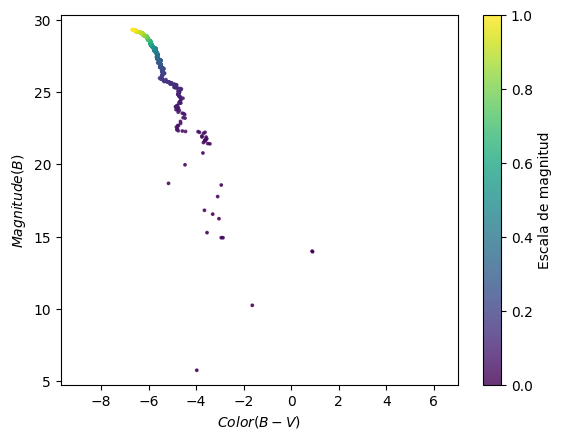

In [101]:
min_len = min(len(tablaNGC55B_d['magnitude']), len(tablaNGC55V_d['magnitude']))

B_color = np.sort(tablaNGC55B_d['magnitude'])[:min_len]
V_color = np.sort(tablaNGC55V_d['magnitude'])[:min_len]

x = B_color - V_color
y = B_color


colors = np.linspace(0, 1, min_len)


plt.scatter(x, y, c=colors, cmap='viridis', marker='o', s=3, alpha=0.8)

plt.gca().invert_yaxis()
plt.ylabel('$Magnitude (B)$')
plt.xlabel('$Color (B-V)$')
plt.xlim(np.min(x) -3, 7)
plt.ylim(np.min(y)-1, np.max(y)+1)

cbar = plt.colorbar()
cbar.set_label('Escala de magnitud')
plt.savefig('Diagrama Color-Magnitud E1')
plt.show()


In [102]:
#Calculamos las magnitudes aparentes usando el zeropoint
tablaNGC55B_d['magnitude'] = zeropointE2_B - 2.5*np.log(tablaNGC55B_d['segment_flux'])
B_color=np.array([np.sort(tablaNGC55B_d['magnitude'])])

tablaNGC55V_d['magnitude'] = zeropointE2_V - 2.5*np.log(tablaNGC55V_d['segment_flux'])
V_color=np.array([np.sort(tablaNGC55V_d['magnitude'])])

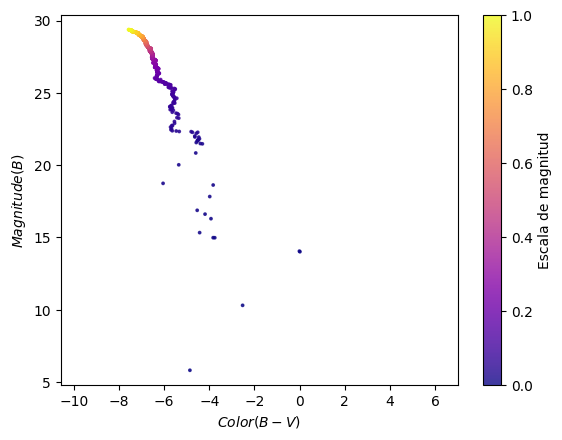

In [103]:
min_len = min(len(tablaNGC55B_d['magnitude']), len(tablaNGC55V_d['magnitude']))

B_color = np.sort(tablaNGC55B_d['magnitude'])[:min_len]
V_color = np.sort(tablaNGC55V_d['magnitude'])[:min_len]

x = B_color - V_color
y = B_color


colors = np.linspace(0, 1, min_len)


plt.scatter(x, y, c=colors, cmap='plasma', marker='o', s=3, alpha=0.8)

plt.gca().invert_yaxis()
plt.ylabel('$Magnitude (B)$')
plt.xlabel('$Color (B-V)$')
plt.xlim(np.min(x) - 3, 7)
plt.ylim(np.min(y)-1, np.max(y)+1)

cbar = plt.colorbar()
cbar.set_label('Escala de magnitud')
plt.savefig('Diagrama Color-Magnitud E2')
plt.show()
